# US Baby Names 1880-2010

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pieces: list[pd.DataFrame] = []

In [3]:
for year in range(1880, 2011):
    path: str = f'datasets/babynames/yob{year}.txt'
    frame: pd.DataFrame = pd.read_csv(path, names= ['name', 'sex', 'birth'])
    frame['year'] = year
    pieces.append(frame)

In [4]:
data: pd.DataFrame = pd.concat(pieces, ignore_index= True)

In [5]:
data.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   birth   1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [7]:
total_births: pd.DataFrame = data.pivot_table(
    values= 'birth',
    index= 'year',
    columns= 'sex',
    aggfunc= 'sum'
)

In [8]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

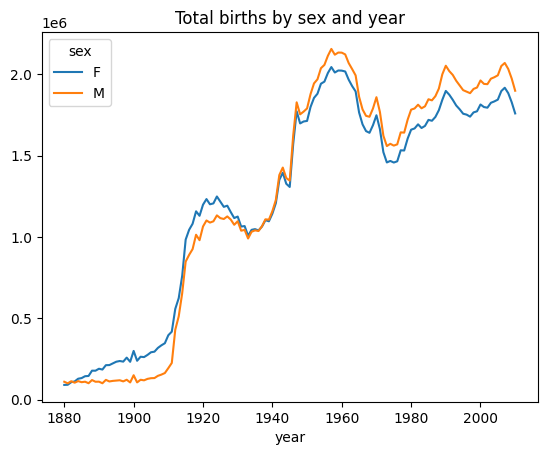

In [9]:
total_births.plot(title= 'Total births by sex and year')

In [10]:
def add_prop(group):
    group['prop'] = group['birth'] / group['birth'].sum()
    return group

In [11]:
names = data.groupby(['year', 'sex'], group_keys= False).apply(add_prop)

In [12]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [13]:
names.groupby(['year', 'sex'])['prop'].sum().all()

True

In [14]:
def get_top1000(group):
    return group.sort_values('birth', ascending= False)[:1000]

In [15]:
top1000 = (
    names.groupby(['year', 'sex'])
    .apply(get_top1000)
    .reset_index(drop= True)
)

In [16]:
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## Analyzing Naming Trends

In [17]:
boys = top1000.loc[top1000.sex == 'M']

In [18]:
girls = top1000.loc[top1000.sex == 'F']

In [19]:
total_births = top1000.pivot_table(
    values= 'birth',
    columns= 'name',
    index= 'year',
    aggfunc= 'sum'
)

In [20]:
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [21]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [22]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

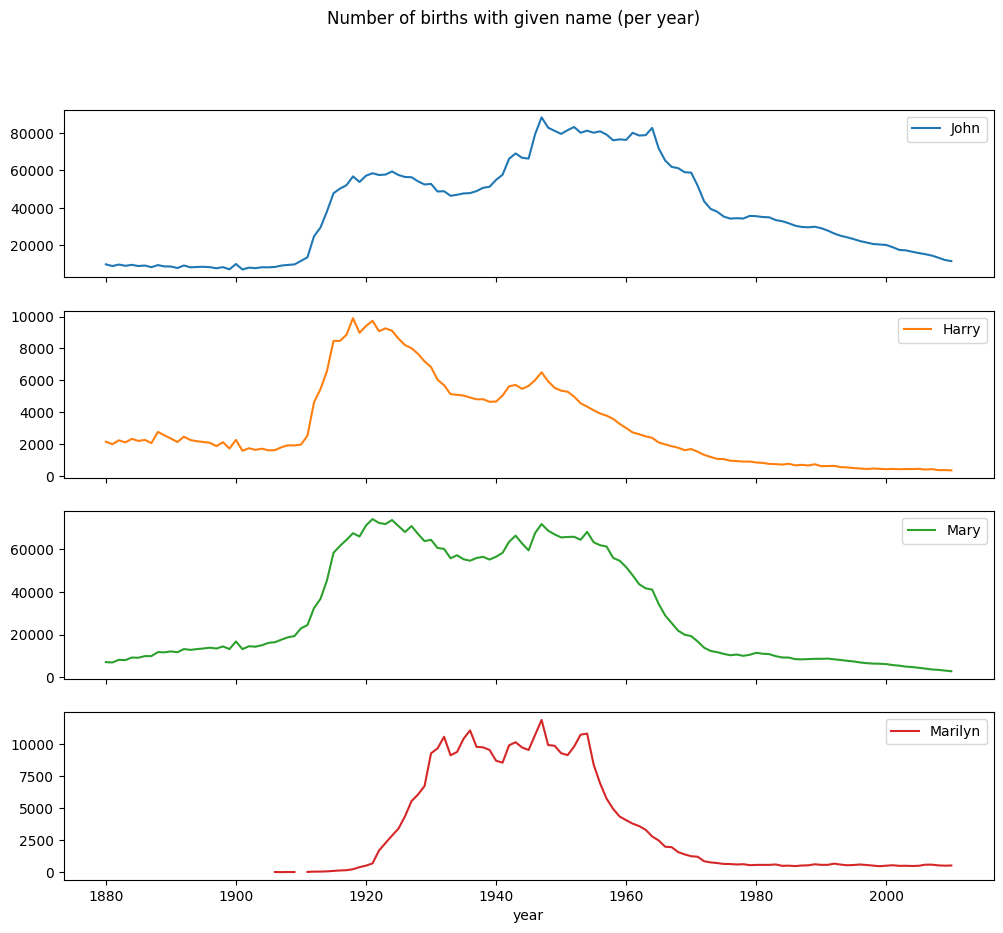

In [23]:
subset.plot(
    subplots= True,
    title= 'Number of births with given name (per year)',
    figsize= (12, 10)
)

### Measuring the increase in naming diversity

In [24]:
table = top1000.pivot_table(
    values= 'prop',
    index= 'year',
    columns= 'sex',
    aggfunc= 'sum'
)

<Axes: title={'center': 'Sum of top1000.prop by year and sex'}, xlabel='year'>

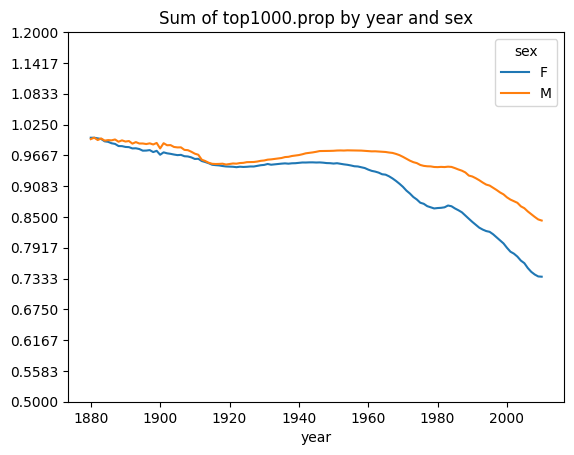

In [25]:
table.plot(
    title= 'Sum of top1000.prop by year and sex',
    yticks= np.linspace(0.5, 1.2, 13)
)

In [26]:
df = boys.loc[boys.year == 2010]

In [27]:
df.head()

,name,sex,birth,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 260877 to 261876
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    1000 non-null   object 
 1   sex     1000 non-null   object 
 2   birth   1000 non-null   int64  
 3   year    1000 non-null   int64  
 4   prop    1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [29]:
prop_cumsum = df.prop.sort_values(ascending= False).cumsum()

In [30]:
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [31]:
prop_cumsum.searchsorted(0.5)

116

In [32]:
df = boys.loc[boys.year == 1900]

In [33]:
in1900 = df.prop.sort_values(ascending= False).cumsum()

In [34]:
in1900.searchsorted(0.5) + 1

25

In [35]:
def get_quantile_count(group, q = 0.5):
    return group.prop.sort_values(ascending= False).cumsum().searchsorted(q) + 1

In [36]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [37]:
diversity = diversity.unstack()

In [38]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

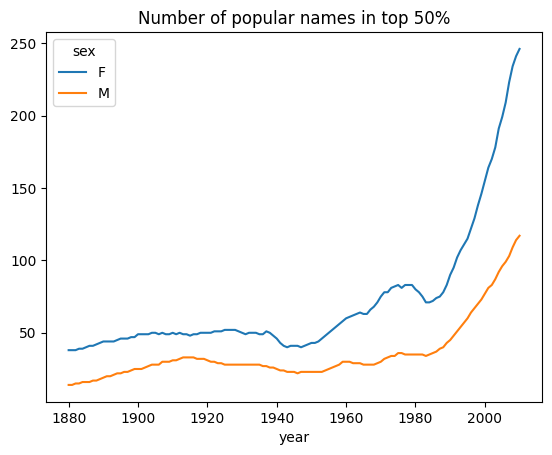

In [39]:
diversity.plot(title= 'Number of popular names in top 50%')

### The 'last letter' revolution

In [40]:
last_letters = names.name.map(lambda x: x[-1])

In [41]:
last_letters.name = 'last_letter'

In [42]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [52]:
table = names.pivot_table(
    values= 'birth',
    index= last_letters,
    columns= ['sex', 'year'],
    aggfunc= 'sum'
)

In [53]:
subtable = table.reindex(columns= [1910, 1960, 2010], level= 'year')

In [54]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [55]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [56]:
letter_prop = subtable / subtable.sum()

In [57]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

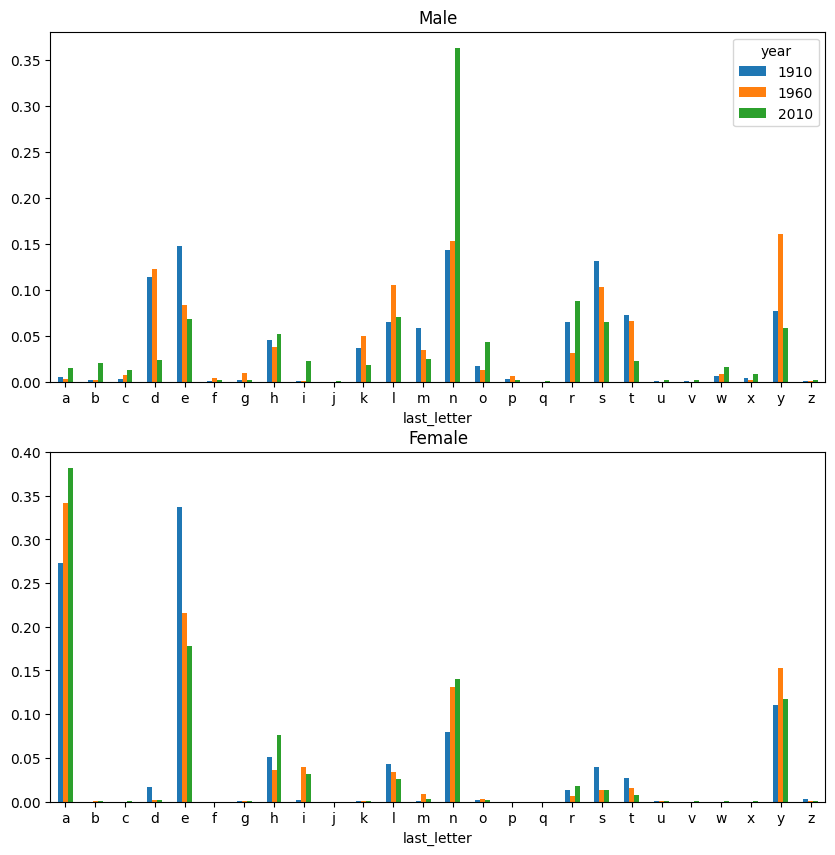

In [67]:
fig, axes = plt.subplots(2, 1, figsize= (10, 10))
letter_prop['M'].plot(kind= 'bar', ax= axes[0], title= 'Male', rot= 0)
letter_prop['F'].plot(kind= 'bar', ax= axes[1], title= 'Female', legend= False, rot= 0)

In [68]:
letter_prop = table / table.sum()

In [69]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [72]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Axes: title={'center': 'Proportions of boys born with names ending in d/n/y over time'}, xlabel='year'>

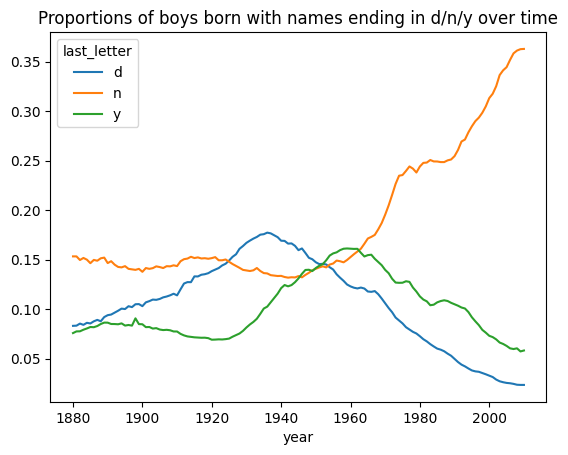

In [74]:
dny_ts.plot(title= 'Proportions of boys born with names ending in d/n/y over time')

### Boy names that became girl names (and vice versa)

In [75]:
all_names = pd.Series(top1000.name.unique())

In [76]:
all_names

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
6863        Masen
6864        Rowen
6865       Yousef
6866       Joziah
6867       Maxton
Length: 6868, dtype: object

In [77]:
lesley_like = all_names.loc[all_names.str.contains('Lesl')]

In [78]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [80]:
filtered = top1000.loc[top1000.name.isin(lesley_like)]

In [81]:
filtered.head()

,name,sex,birth,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083


In [84]:
filtered.groupby('name')['birth'].count()

name
Leslee     11
Lesley    117
Lesli       7
Leslie    249
Lesly      16
Name: birth, dtype: int64

In [85]:
table = filtered.pivot_table(
    values= 'birth',
    index= 'year',
    columns= 'sex',
    aggfunc= 'sum'
)

In [88]:
table = table.div(table.sum(axis= 'columns'), axis= 'index')

<Axes: title={'center': 'Proportion of male/female Lesley-like names over time'}, xlabel='year'>

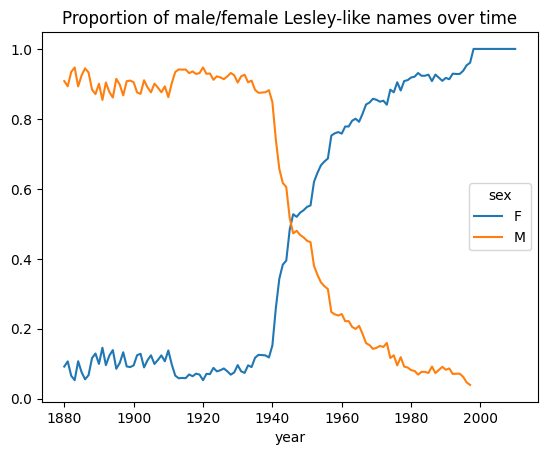

In [90]:
table.plot(title= 'Proportion of male/female Lesley-like names over time')